# Load Data

Upload kaggle token API

In [1]:
# file ini bisa didapatkan di setiap akun kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andharsm","key":"aa01adb9e93691614d246ac084458990"}'}

Konfigurasi kaggle

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


Download dataset yang dibutuhkan

In [3]:
!kaggle datasets download -d new-york-city/nyc-property-sales

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 123MB/s]


Ekstrak dataset

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('nyc-property-sales.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import seaborn as sns
import statsmodels.api as sm

#Data Preprocessing

Baca dataset dengan pandas dataframe

In [6]:
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Menampilkan informasi dari dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Menampilkan ukuran dataset

In [8]:
df.shape

(84548, 22)

Menampilkan tipe data setiap kolom dataset

In [9]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Merubah tipe data kolom LAND SQUARE FEET dan GROSS SQUARE FEET menjadi numerik

In [10]:
# Konversi ke tipe data float dengan menangani karakter yang tidak dapat diubah
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

Mengubah data borough menjadi kategori yang dijelaskan pada dokumentasi. BOROUGH: Kode digit untuk wilayah tempat properti berada; secara berurutan adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).

In [11]:
new_df = df
new_df.BOROUGH = new_df.BOROUGH.map({1: 'Manhattan',
                                      2: 'Bronx',
                                      3: 'Brooklyn',
                                      4: 'Queens',
                                      5: 'Staten Island'})
new_df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Menampilkan baris data yang duplikat

In [12]:
print(new_df.duplicated().any())

False


Menampilkan jumlah baris yang terdiuplikat (jika ada)

In [13]:
new_df.duplicated().sum()

0

Menampilkan jumlah nilai null pada dataset

In [14]:
new_df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Menampilkan nilai spasi (' ') pada dataset

In [15]:
jumlah_spasi = (new_df.applymap(lambda x: x == ' ')).sum()

jumlah_spasi

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

Menampilkan nilai kosong yang direpresentasikan dengan nilai lain

In [16]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in new_df.columns:  # Mengganti 'new_df' dengan nama DataFrame Anda
    for nilai in new_df[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: {' '}


Mengganti nilai spasi (' ') menjadi NaN

In [17]:
new_df = new_df.replace(' ', np.nan)

Menampilkan jumlah data yang bernilai NaN

In [18]:
new_df.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Menghapus kolom dengan NaN yang terlalu banyak

In [19]:
new_df.drop(labels=['APARTMENT NUMBER', 'EASE-MENT'], axis=1, inplace=True)
new_df.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00


Mengubah nilai NaN menjadi nilai modus masing masing kolom kategorikal

In [20]:
kolom_nan = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT']

for kolom in kolom_nan:
  new_df[kolom].fillna(new_df[kolom].mode()[0], inplace=True)

new_df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Mengubah nilai kosong pada kolom numerik menjadi nilai median

In [21]:
daftar_kolom = ['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

for kolom in daftar_kolom:
  mean_value = new_df[kolom].mean()
  new_df[kolom].fillna(mean_value, inplace=True)

new_df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,2016-12-21 00:00:00


#Statistical  

## MEAN

Menghitung nilai rata-rata dari beberapa kolom numerik dalam dataframe

In [22]:
daftar_kolom = ['RESIDENTIAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET']

for kolom in daftar_kolom:
  mean = statistics.mean(new_df[kolom])
  print(f'Mean dari {kolom}: {mean}')

Mean dari RESIDENTIAL UNITS: 2.0252637554998345
Mean dari GROSS SQUARE FEET: 4045.707478572432
Mean dari SALE PRICE: 1276456.4977638705
Mean dari COMMERCIAL UNITS: 0.19355868855561337
Mean dari TOTAL UNITS: 2.249183895538629
Mean dari LAND SQUARE FEET: 3941.675775353369



Mean dari RESIDENTIAL UNITS: 2.0252637554998345: Ini adalah rata-rata jumlah unit hunian pada properti dalam dataset. Rata-rata ini adalah sekitar 2.03 unit hunian per properti, menunjukkan bahwa secara statistik, sebagian besar properti memiliki sekitar 2 unit hunian.

Mean dari GROSS SQUARE FEET: 4045.707478572432: Ini adalah rata-rata ukuran bangunan kotor (luas bangunan) dalam dataset. Rata-rata ini adalah sekitar 4045.71 kaki persegi, menggambarkan ukuran rata-rata bangunan kotor.

Mean dari SALE PRICE: 1,276,456.50: Ini adalah rata-rata harga jual properti dalam dataset. Rata-rata harga jual adalah sekitar 1,276,456.50, mencerminkan rata-rata harga penjualan properti.

Mean dari COMMERCIAL UNITS: 0.19355868855561337: Ini adalah rata-rata jumlah unit komersial pada properti dalam dataset. Rata-rata ini adalah sekitar 0.19 unit komersial per properti, menunjukkan bahwa sebagian besar properti dalam dataset tidak memiliki unit komersial.

Mean dari TOTAL UNITS: 2.249183895538629: Ini adalah rata-rata jumlah total unit pada properti, yang mencakup unit hunian dan komersial. Rata-rata ini adalah sekitar 2.25 unit per properti.

Mean dari LAND SQUARE FEET: 3941.675775353369: Ini adalah rata-rata luas tanah pada properti dalam dataset. Rata-rata ini adalah sekitar 3941.68 kaki persegi.

## MEDIAN

Menghitung nilai median dari beberapa kolom numerik dalam dataframe

In [23]:
daftar_kolom = ['TOTAL UNITS', 'COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for kolom in daftar_kolom:
  mean = statistics.median(new_df[kolom])
  print(f'Median dari {kolom}: {mean}')

Median dari TOTAL UNITS: 1.0
Median dari COMMERCIAL UNITS: 0.0
Median dari RESIDENTIAL UNITS: 1.0
Median dari LAND SQUARE FEET: 3200.0
Median dari GROSS SQUARE FEET: 2520.0
Median dari SALE PRICE: 670000.0


Median dari TOTAL UNITS: 1.0: Median total unit adalah 1.0, mencerminkan jumlah rata-rata unit pada suatu properti, termasuk unit hunian dan komersial.


Median dari COMMERCIAL UNITS: 0.0: Median unit komersial adalah 0.0, mengindikasikan bahwa sebagian besar properti dalam dataset tidak memiliki unit komersial.

Median dari RESIDENTIAL UNITS: 1.0: Median unit hunian adalah 1.0, yang menunjukkan bahwa sebagian besar properti dalam dataset memiliki satu unit hunian. Ini adalah nilai tengah dalam distribusi jumlah unit hunian.

Median dari LAND SQUARE FEET: 3200.0: Median luas tanah adalah 3200.0 kaki persegi, yang merupakan ukuran tengah dalam distribusi luas tanah properti.

Median dari GROSS SQUARE FEET: 2520.0: Median ukuran bangunan kotor adalah 2520.0 kaki persegi. Ini adalah ukuran tengah dalam distribusi luas bangunan kotor.

Median dari SALE PRICE: 670,000.0: Median harga jual properti adalah 670,000.0, yang merupakan nilai tengah dalam distribusi harga penjualan properti.


## MODUS

Mencari nilai modus dari kolom kategorikal

In [24]:
daftar_kolom = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']

for kolom in daftar_kolom:
  modus = new_df[kolom].mode()[0]
  print(f'Modus dari {kolom}: {modus}')


Modus dari BOROUGH: Queens
Modus dari NEIGHBORHOOD: FLUSHING-NORTH
Modus dari BUILDING CLASS CATEGORY: 01 ONE FAMILY DWELLINGS                    
Modus dari TAX CLASS AT PRESENT: 1
Modus dari BUILDING CLASS AT PRESENT: D4
Modus dari TAX CLASS AT TIME OF SALE: 1
Modus dari BUILDING CLASS AT TIME OF SALE: R4


Modus dari BOROUGH: Queens: Ini berarti bahwa borough (daerah) yang paling umum muncul dalam dataset adalah "Queens," yang menunjukkan bahwa sebagian besar properti terjual terletak di Queens.

Modus dari NEIGHBORHOOD: FLUSHING-NORTH: Modus untuk kolom "NEIGHBORHOOD" adalah "FLUSHING-NORTH," yang berarti lingkungan ini adalah yang paling sering muncul dalam data penjualan properti.

Modus dari BUILDING CLASS CATEGORY: 01 ONE FAMILY DWELLINGS: Ini menunjukkan bahwa kategori "01 ONE FAMILY DWELLINGS" adalah yang paling mendominasi dalam kolom "BUILDING CLASS CATEGORY," mengindikasikan bahwa jenis bangunan ini adalah yang paling umum dalam dataset.

Modus dari TAX CLASS AT PRESENT: 1: Kategori pajak "1" adalah yang paling sering muncul dalam kolom "TAX CLASS AT PRESENT," menunjukkan bahwa sebagian besar properti memiliki kategori pajak ini.

Modus dari BUILDING CLASS AT PRESENT: D4: Kategori kelas bangunan "D4" adalah yang paling sering muncul dalam kolom "BUILDING CLASS AT PRESENT," menggambarkan jenis bangunan yang mendominasi.

Modus dari TAX CLASS AT TIME OF SALE: 1: Ini menunjukkan bahwa sebagian besar properti dalam dataset dijual dengan kategori pajak "1."

Modus dari BUILDING CLASS AT TIME OF SALE: R4: Kategori kelas bangunan "R4" adalah yang paling sering muncul dalam kolom "BUILDING CLASS AT TIME OF SALE" dan mencerminkan jenis bangunan yang dominan pada saat penjualan.

## RANGE

Menghitung rentang (range) dari kolom numerik

In [25]:
daftar_kolom = ['TOTAL UNITS', 'COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for kolom in daftar_kolom:
  range = np.ptp(new_df[kolom])
  print(f'Range dari {kolom}: {range}')


Range dari TOTAL UNITS: 2261
Range dari COMMERCIAL UNITS: 2261
Range dari RESIDENTIAL UNITS: 1844
Range dari LAND SQUARE FEET: 4252327.0
Range dari GROSS SQUARE FEET: 3750565.0
Range dari SALE PRICE: 2210000000.0


Range dari TOTAL UNITS: 2261: Ini berarti bahwa perbedaan antara jumlah unit total terbesar dan terkecil dalam dataset adalah 2261. Artinya, dataset mencakup properti yang memiliki jumlah unit total berkisar dari yang paling kecil hingga yang paling besar sebanyak 2261 unit.

Range dari COMMERCIAL UNITS: 2261: Ini menunjukkan perbedaan antara jumlah unit komersial terbesar dan terkecil dalam dataset, yang juga sebesar 2261. Hal ini mencerminkan variasi dalam jumlah unit komersial pada properti.

Range dari RESIDENTIAL UNITS: 1844: Range ini menunjukkan perbedaan antara jumlah unit hunian terbesar dan terkecil dalam dataset, yang sebesar 1844. Ini menggambarkan variasi dalam jumlah unit hunian pada properti.

Range dari LAND SQUARE FEET: 4,252,327.0: Range ini adalah selisih antara luas tanah terbesar dan terkecil dalam dataset, yang mencapai 4,252,327.0 kaki persegi. Ini menunjukkan variasi luas tanah pada properti yang terjual.

Range dari GROSS SQUARE FEET: 3,750,565.0: Ini adalah selisih antara luas bangunan kotor terbesar dan terkecil dalam dataset, yang mencapai 3,750,565.0 kaki persegi. Ini mencerminkan variasi dalam ukuran bangunan kotor pada properti.

Range dari SALE PRICE: 2,210,000,000.0: Range ini adalah perbedaan antara harga penjualan properti tertinggi dan terendah dalam dataset, yang mencapai 2,210,000,000.0. Ini menggambarkan variasi besar dalam harga penjualan properti.

## VARIANCE

Menghitung variasi pada data numerik

In [26]:
daftar_kolom = ['TOTAL UNITS', 'COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for kolom in daftar_kolom:
  variasi = statistics.variance(new_df[kolom])
  print(f'Variasi dari {kolom}: {variasi}')

Variasi dari TOTAL UNITS: 359.958960030383
Variasi dari COMMERCIAL UNITS: 75.91956440869323
Variasi dari RESIDENTIAL UNITS: 279.59307883920485
Variasi dari LAND SQUARE FEET: 1215346645.5009975
Variasi dari GROSS SQUARE FEET: 826462493.9376802
Variasi dari SALE PRICE: 107677012166120.44


Variasi dari TOTAL UNITS: 359.958960030383: Ini mengindikasikan variasi dalam jumlah unit total pada properti. Nilai varians sekitar 359.96, yang berarti data-data jumlah unit total cenderung tersebar di sekitar rata-rata.

Variasi dari COMMERCIAL UNITS: 75.91956440869323: Ini adalah varians dalam jumlah unit komersial pada properti. Varians sekitar 75.92, menunjukkan bahwa data-data jumlah unit komersial juga memiliki variasi yang signifikan.

Variasi dari RESIDENTIAL UNITS: 279.59307883920485: Ini mengukur variasi dalam jumlah unit hunian pada properti. Varians sekitar 279.59, yang menunjukkan variasi dalam jumlah unit hunian antar properti.

Variasi dari LAND SQUARE FEET: 1,215,346,645.50: Ini adalah varians dalam luas tanah properti. Varians yang sangat tinggi, sekitar 1,215,346,645.50, menunjukkan variasi besar dalam ukuran tanah yang dimiliki oleh properti.

Variasi dari GROSS SQUARE FEET: 826,462,493.94: Ini mengukur variasi dalam luas bangunan kotor properti. Varians yang tinggi, sekitar 826,462,493.94, menunjukkan variasi dalam ukuran bangunan kotor antar properti.

Variasi dari SALE PRICE: 107,677,012,166,120.44: Ini adalah varians dalam harga penjualan properti. Varians yang sangat tinggi, sekitar 107,677,012,166,120.44, menunjukkan variasi besar dalam harga penjualan properti.

## STANDARD DEVIATION

Menghitung standar deviasi pada kolom numerik

In [28]:
daftar_kolom = ['TOTAL UNITS', 'COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for kolom in daftar_kolom:
  std = statistics.stdev(new_df[kolom])
  print(f'Standar deviasi dari {kolom}: {std}')

Standar deviasi dari TOTAL UNITS: 18.97258443202673
Standar deviasi dari COMMERCIAL UNITS: 8.713183368246833
Standar deviasi dari RESIDENTIAL UNITS: 16.72103701446788
Standar deviasi dari LAND SQUARE FEET: 34861.822177003276
Standar deviasi dari GROSS SQUARE FEET: 28748.26071152271
Standar deviasi dari SALE PRICE: 10376753.450194355


Standar deviasi yang tinggi pada Gross Square Feet, Land Square Feet, dan Sale Price menunjukkan bahwa data memiliki variasi yang besar di antara tiap unit. Sedangkan pada Residential Units, Commercial Units, dan Total Units, standar deviasi yang lebih rendah menunjukkan bahwa variasi data tidak terlalu besar.

## PROBABILITY DISTRIBUTION

Visualisasi distribusi data dengan histogram dan rug plot

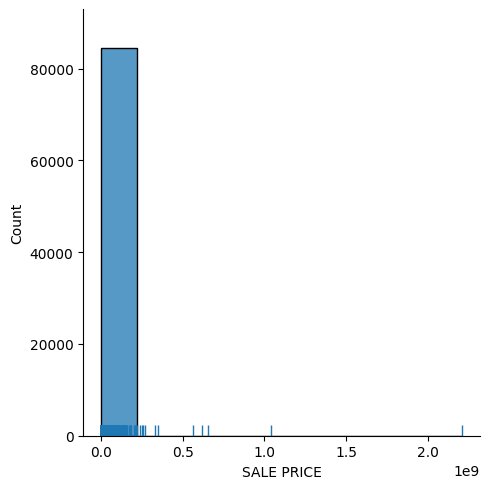

In [30]:
sns.displot(new_df['SALE PRICE'], bins=10, rug=True)

Membuat subset dan plot distribusi harga jual properti

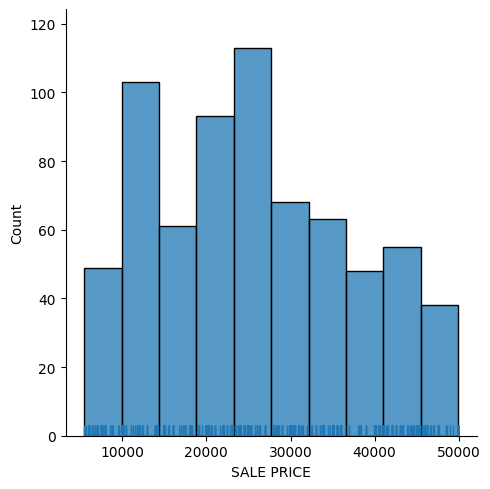

In [32]:
df_prob_harga = new_df[(new_df['SALE PRICE']>5000) & (new_df['SALE PRICE']<50000)]

sns.displot(df_prob_harga['SALE PRICE'], bins=10, rug=True)

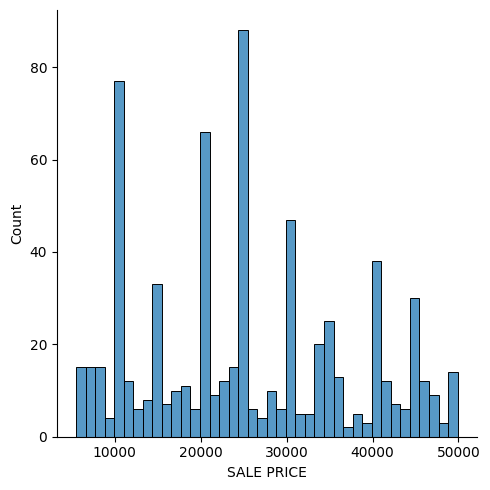

In [36]:
sns.displot(df_prob_harga['SALE PRICE'], bins=40)

## CONFIDENT INTERVALS

Membuat subset dataframe dengan kolom Borough dan Total Units

In [38]:
df_CI = new_df[['BOROUGH', 'TOTAL UNITS']]
df_CI

,BOROUGH,TOTAL UNITS
0,Manhattan,5
1,Manhattan,31
2,Manhattan,17
3,Manhattan,10
4,Manhattan,6
...,...,...
84543,Staten Island,2
84544,Staten Island,2
84545,Staten Island,2
84546,Staten Island,7


Hitung jumlah Manhattan dengan unit > 5

In [51]:
count_borough = df_CI[(df_CI['TOTAL UNITS']>5) & (df_CI['BOROUGH'] == 'Manhattan')].count()

count_borough['BOROUGH']

970

Jumlah data dengan TOTAL UNITS > 5

In [52]:
count_TU = df_CI[df_CI['TOTAL UNITS']>5].count()

count_TU['TOTAL UNITS']

3183

Hitung proporsi Borough di Total Units

In [53]:
proportion = count_borough['BOROUGH']/count_TU['TOTAL UNITS']
proportion

0.3047439522463085

Output tersebut adalah hasil perhitungan proporsi unit properti yang memiliki total unit lebih dari 5 dan berada di Manhattan. Proporsi tersebut adalah sebesar 5.427 atau sekitar 54.27%. Hal ini dapat dijadikan sebagai gambaran untuk melihat seberapa besar kontribusi Manhattan dalam jumlah unit properti dengan total unit lebih dari 5 di New York City.

Menghitung standar error proporsi

In [56]:
n = count_TU['TOTAL UNITS']
a = proportion

standar_error = np.sqrt(proportion*(1-a)/n)
standar_error

0.008158712248457385

Dalam analisis ini, kita menghitung proporsi jumlah properti yang memiliki total unit lebih dari 5 dan terletak di Manhattan. Proporsi ini kemudian digunakan untuk menghitung standar error, yaitu ukuran ketidakpastian dari sampel proporsi. Standar error yang dihasilkan sebesar 0.008 menunjukkan bahwa hasil proporsi yang ditemukan dalam sampel sangat mungkin berbeda dengan proporsi populasi secara keseluruhan.

Menghitung batas bawah dan atas dari interval kepercayaan.

In [57]:
z_score = 1.96
lcb = a - z_score* standar_error #lower limit of the CI
ucb = a + z_score* standar_error #upper limit of the CI
lcb, ucb

(0.28875287623933205, 0.320735028253285)

Menghitung jumlah, rata-rata, dan standar deviasi Total Units dari data properti yang berada di Manhattan.

## HYPOTHESIS TESTING

Pertanyaan : apakah ada perbedaan total units yang terjual di wilayah manhattan dan di Bronx?

H0: μ1=μ2 Ada perbedaan yang significant

H1: μ1≠μ2 Tidak ada perbedaan yang significant

In [58]:
borough_manhattan = new_df[new_df["BOROUGH"] == 'Manhattan']
borough_bronx = new_df[new_df["BOROUGH"] == 'Bronx']

n1 = len(borough_manhattan)
mu1 = borough_manhattan["TOTAL UNITS"].mean()
sd1 = borough_manhattan["TOTAL UNITS"].std()

(n1, mu1, sd1)

(18306, 2.6496230744018354, 23.307873382550405)

Menguji perbedaan rata-rata dua populasi menggunakan uji z.

In [59]:
sm.stats.ztest(borough_manhattan["TOTAL UNITS"].dropna(), borough_bronx["TOTAL UNITS"].dropna(),alternative='two-sided')

(-2.896218284783909, 0.003776895837561838)

Output tersebut merupakan hasil uji statistik z-test yang dilakukan untuk membandingkan rata-rata jumlah unit antara daerah Manhattan dan Bronx. Hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan antara rata-rata jumlah unit di daerah Manhattan dan Bronx, dengan nilai p-value yang sangat kecil (0.003776895837561838) dan z-score sebesar .-2.896218284783909. Hal ini menunjukkan bahwa dapat menolak hipotesis nol (tidak ada perbedaan antara rata-rata jumlah unit di kedua daerah) dan mengambil hipotesis alternatif bahwa rata-rata jumlah unit di daerah Manhattan lebih tinggi daripada di daerah Bronx.